In [2]:
import sys
import csv
import tweepy
import matplotlib.pyplot as plt
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

## Twitter credentials
consumer_key = "vXKHnV4JmfMABDdBIo0ZV4H8d"
consumer_secret = "WGD2YXAKjbanj2g0oxjq2wYRRVhOjedtxO3xZSKikSOOIcLIA1"
access_token = "940458986-xOOlmeSvQ4Ws1prLSwjmr8bIZLz5CMwH6HzVOuCm"
access_token_secret = "qfKJZrkqkYJAieoJxQawkFjrGG7YBYQ6N0HDoCOxUr3FR"

## set up an instance of Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## search Twitter for something that interests you
query = input("What subject do you want to analyze for this example? \n")
number = input("How many Tweets do you want to analyze? \n")

results = api.search(
   lang="en",
   q=query + " -rt",
   count=number,
   result_type="recent"
)
file_name = 'Twitter_sentiment_download.csv'

with open(file_name, 'w', newline='') as csvfile:
   csv_writer = csv.DictWriter(
       f=csvfile,
       fieldnames=["Tweet", "Sentiment"]
   )
   csv_writer.writeheader()


What subject do you want to analyze for this example? 
 politics
How many Tweets do you want to analyze? 
 100


In [6]:
#access data from S3 Bucket
from sagemaker import get_execution_role
role = get_execution_role()
import boto3
s3_client = boto3.client('s3')
data_bucket_name='mishalmf'
obj_list=s3_client.list_objects(Bucket=data_bucket_name)
file=[]
for contents in obj_list['Contents']:
    file.append(contents['Key'])


In [35]:
twitter = pd.read_csv('s3a://mishalmf/SocialMedia/Twitter_sentiment_download.csv')
twitter.head(3)

,Tweet,Sentiment
0,Trump administration resists global climate ef...,neutral
1,"""#Politics News: France tells #Trump to stop i...",neutral
2,"""#POTUS News: With Nick Ayers out of the runn...",neutral


In [36]:
from textblob import TextBlob

twitter['Tweet']
sentiment = twitter['Tweet'].apply(lambda x : TextBlob(x).sentiment)
df=pd.concat([twitter,sentiment.apply(pd.Series)],1)
print(df)

                                                 Tweet Sentiment         0  \
0    Trump administration resists global climate ef...   neutral  0.000000   
1    "#Politics News: France tells #Trump to stop i...   neutral  0.000000   
2    "#POTUS News:  With Nick Ayers out of the runn...   neutral -0.125000   
3    @tedlieu Not really Ted!\nhttps://t.co/O0HsbgbUbz   neutral -0.125000   
4    Army queries for Labor MP Pierre Yangs China l...   neutral  0.000000   
5    Tavis Smiley rips Bill Kristol: You are 'the w...  negative -1.000000   
6    Humanism: In gameshow format, politics with tw...   neutral  0.000000   
7                New Top Hat!\nhttps://t.co/vmxNZt7FV7   neutral  0.380682   
8    @Crampers1 @rtenews @GerryAdamsSF That's not l...  negative  0.000000   
9    Who Is Paying for the War in Yemen? - The Atla...   neutral  0.000000   
10   @MrAComerford @MelodyHollywood @jackappleby So...   neutral  0.000000   
11   FFS! Trump administration resists global clima...   neutral

In [37]:
df.drop(['Sentiment'], axis=1)

,Tweet,0,1
0,Trump administration resists global climate ef...,0.000000,0.000000
1,"""#Politics News: France tells #Trump to stop i...",0.000000,0.000000
2,"""#POTUS News: With Nick Ayers out of the runn...",-0.125000,0.375000
3,@tedlieu Not really Ted!\nhttps://t.co/O0HsbgbUbz,-0.125000,0.200000
4,Army queries for Labor MP Pierre Yangs China l...,0.000000,0.000000
5,Tavis Smiley rips Bill Kristol: You are 'the w...,-1.000000,1.000000
6,"Humanism: In gameshow format, politics with tw...",0.000000,0.000000
7,New Top Hat!\nhttps://t.co/vmxNZt7FV7,0.380682,0.477273
8,@Crampers1 @rtenews @GerryAdamsSF That's not l...,0.000000,0.000000
9,Who Is Paying for the War in Yemen? - The Atla...,0.000000,0.000000


In [39]:
df.columns.values[2] = 'polarity'
df.columns.values[3] = 'subjectivity'
df.head()

,Tweet,Sentiment,polarity,subjectivity
0,Trump administration resists global climate ef...,neutral,0.000,0.000
1,"""#Politics News: France tells #Trump to stop i...",neutral,0.000,0.000
2,"""#POTUS News: With Nick Ayers out of the runn...",neutral,-0.125,0.375
3,@tedlieu Not really Ted!\nhttps://t.co/O0HsbgbUbz,neutral,-0.125,0.200
4,Army queries for Labor MP Pierre Yangs China l...,neutral,0.000,0.000


In [40]:
df['label'] = 0
df.loc[df['polarity'] > 0.2, 'label'] = 1
df.loc[df['polarity'] < -0.2, 'label'] = -1
df.head()

,Tweet,Sentiment,polarity,subjectivity,label
0,Trump administration resists global climate ef...,neutral,0.000,0.000,0
1,"""#Politics News: France tells #Trump to stop i...",neutral,0.000,0.000,0
2,"""#POTUS News: With Nick Ayers out of the runn...",neutral,-0.125,0.375,0
3,@tedlieu Not really Ted!\nhttps://t.co/O0HsbgbUbz,neutral,-0.125,0.200,0
4,Army queries for Labor MP Pierre Yangs China l...,neutral,0.000,0.000,0


In [41]:
df2 = df[['Tweet', 'label']]
df2.to_csv('Twitter_Sentiment_analysis_.csv', mode='a', encoding='utf-8', index=False)

In [42]:
print("Positive Tweets:\n")
pprint(list(df[df['label'] == 1].Tweet)[:5], width=200)

print("\nNegative Tweets:\n")
pprint(list(df[df['label'] == -1].Tweet)[:5], width=200)

Positive Tweets:

['New Top Hat!\nhttps://t.co/vmxNZt7FV7',
 'The numbers dont lie so why arent we doing more to halt climate change? https://t.co/7jedI8Fa1n',
 '@realDonaldTrump You tried that line at the UN, and they laughed at you. One legislative package (tax cuts for the https://t.co/7VPwhSMlNP',
 '@madisongesiotto Ohio State. Haha. Also, enjoy your perspective covering politics.',
 '@KamalaHarris I dont care what people look like, I want leaders who will do the best for our country. Identity politics is dumb.']

Negative Tweets:

["Tavis Smiley rips Bill Kristol: You are 'the worst of America' for using Ebola in politics https://t.co/F6uNuLOblu",
 'Russians interacted with at least 14 Trump associates during the campaign and transition https://t.co/er3tZruKBa https://t.co/ZWsTcTgJvd',
 '@AP_Politics Trump, Tump,Trump, all day, all night! Living in fake news medias heads. No news but Trump. ',
 '@FiveRights It is the politics of envy. They hate him because they are not him, and ne

In [43]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    84
 1    21
-1     8
Name: label, dtype: int64
 0    74.336283
 1    18.584071
-1     7.079646
Name: label, dtype: float64


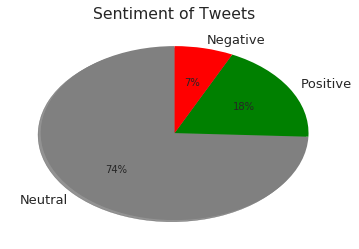

In [60]:
counts = df.label.value_counts(normalize=True) * 100

colors = ['grey', 'green', 'red',]
labels = 'Neutral', 'Positive', 'Negative'

## use matplotlib to plot the chart
plt.pie(
   x=counts,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90,
   autopct = '%i%%'
)


plt.title("Sentiment of Tweets")
plt.show()


In [45]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [46]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


In [47]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [48]:
# remove twitter handles (@user)
import re
df['tidy_tweet'] = np.vectorize(remove_pattern)(twitter['Tweet'], "@[\w]*")
df['tidy_tweet'] = np.vectorize(remove_pattern)(twitter['Tweet'], "http[\w]*")
df.head()

,Tweet,Sentiment,polarity,subjectivity,label,tidy_tweet
0,Trump administration resists global climate ef...,neutral,0.000,0.000,0,Trump administration resists global climate ef...
1,"""#Politics News: France tells #Trump to stop i...",neutral,0.000,0.000,0,"""#Politics News: France tells #Trump to stop i..."
2,"""#POTUS News: With Nick Ayers out of the runn...",neutral,-0.125,0.375,0,"""#POTUS News: With Nick Ayers out of the runn..."
3,@tedlieu Not really Ted!\nhttps://t.co/O0HsbgbUbz,neutral,-0.125,0.200,0,@tedlieu Not really Ted!\n://t.co/O0HsbgbUbz
4,Army queries for Labor MP Pierre Yangs China l...,neutral,0.000,0.000,0,Army queries for Labor MP Pierre Yangs China l...


In [49]:
# remove special characters, numbers, punctuations
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,Tweet,Sentiment,polarity,subjectivity,label,tidy_tweet
0,Trump administration resists global climate ef...,neutral,0.000,0.000,0,Trump administration resists global climate ef...
1,"""#Politics News: France tells #Trump to stop i...",neutral,0.000,0.000,0,#Politics News France tells #Trump stop interf...
2,"""#POTUS News: With Nick Ayers out of the runn...",neutral,-0.125,0.375,0,#POTUS News With Nick Ayers running #Trump mul...
3,@tedlieu Not really Ted!\nhttps://t.co/O0HsbgbUbz,neutral,-0.125,0.200,0,tedlieu really HsbgbUbz
4,Army queries for Labor MP Pierre Yangs China l...,neutral,0.000,0.000,0,Army queries Labor Pierre Yangs China links gm...


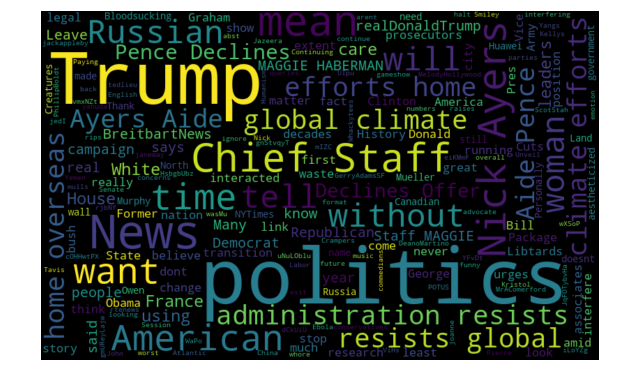

In [50]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

          Frequency
Word               
politics          7
means             4
like              3
many              3
dont              2
people            2
want              2
leaders           2
decades           2
great             2


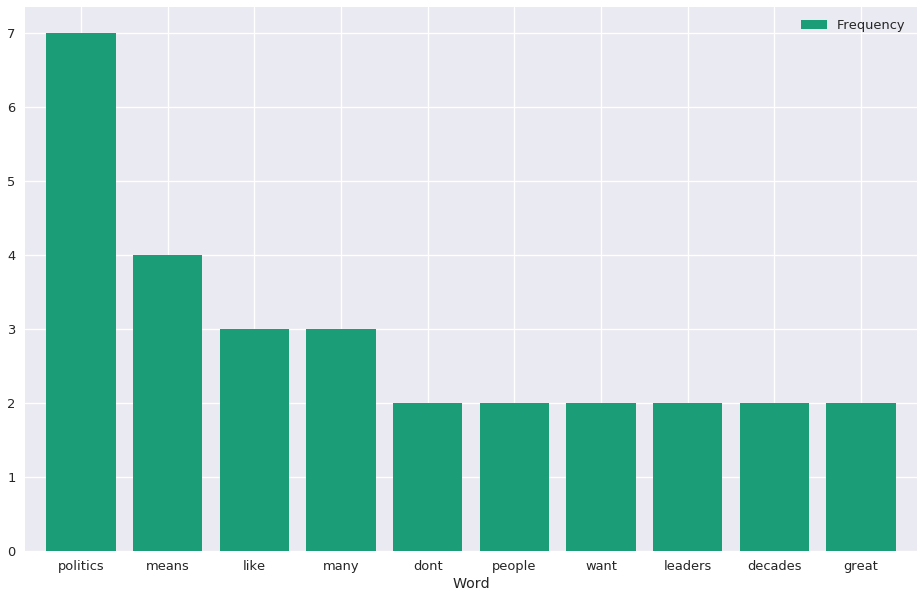

In [51]:
positive_df = df.loc[df['label'] == 1]
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stop_words))
# replace '|'-->' ' and drop all stopwords
words = (positive_df.tidy_tweet
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

positive_dist = nltk.FreqDist(words)
# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)


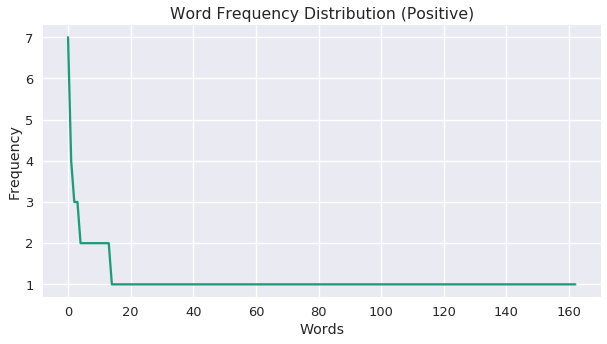

In [52]:
y_val = [x[1] for x in positive_dist.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

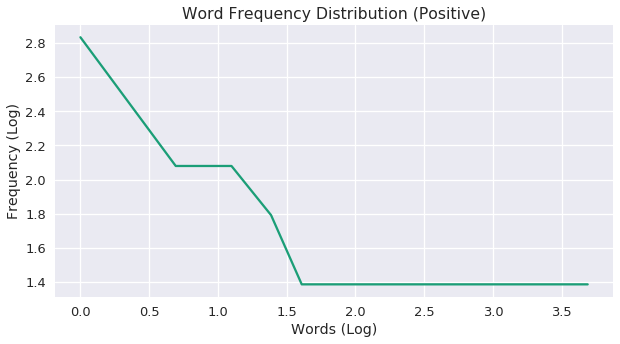

In [53]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

            Frequency
Word                 
politics            5
trump               5
russians            2
interacted          2
least               2
associates          2
campaign            2
transition          2
news                2
tavis               1


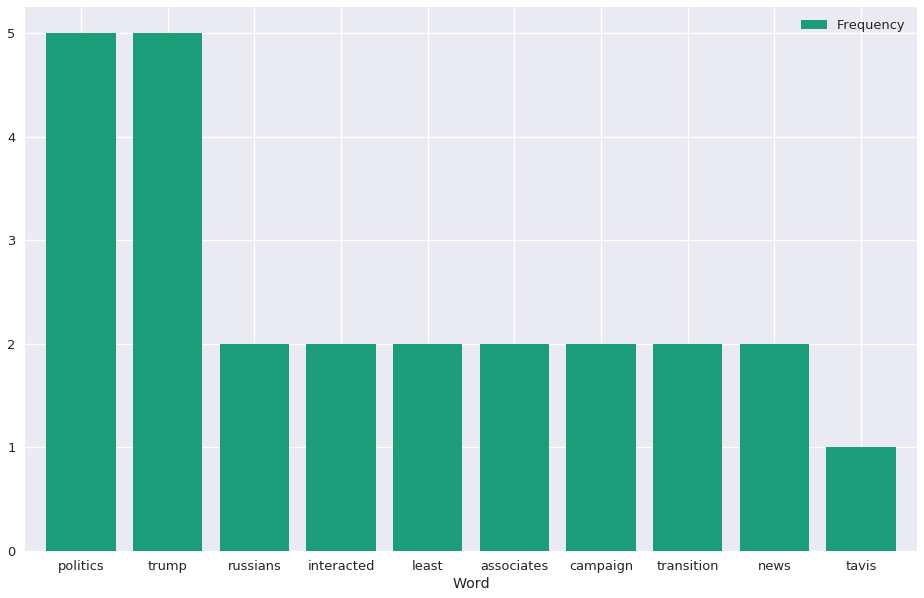

In [54]:
negative_df = df.loc[df['label'] == -1]
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stop_words))
# replace '|'-->' ' and drop all stopwords
words = (negative_df.tidy_tweet
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

negative_dist = nltk.FreqDist(words)
# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

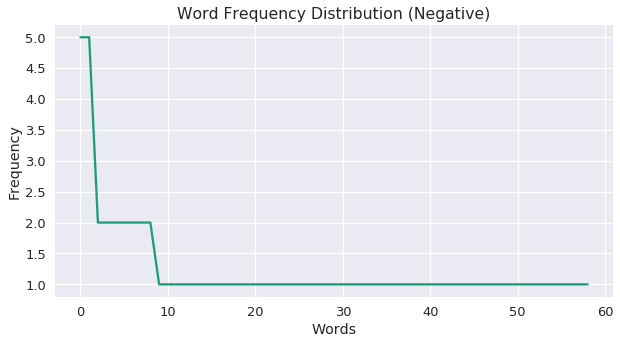

In [55]:
y_val = [x[1] for x in negative_dist.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

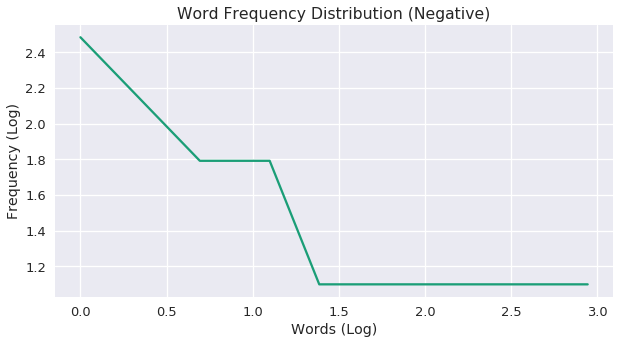

In [56]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()